In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

### SETP #1: IMPORT LIBRARIES

In [2]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [3]:
tf.__version__

'2.0.0'

### STEP #2: LOAD DATASET

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle

In [5]:
!ls -al '/content/gdrive/My Drive/Colab Notebooks/Auto Encoder/traffic-signs-data'

total 155873
-rw------- 1 root root  38888118 Oct  4  2018 test.p
-rw------- 1 root root 107146452 Oct  4  2018 train.p
-rw------- 1 root root  13578712 Oct  4  2018 valid.p


### Execute on COLAB

In [6]:
with open("/content/gdrive/My Drive/Colab Notebooks/Auto Encoder/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/gdrive/My Drive/Colab Notebooks/Auto Encoder/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/gdrive/My Drive/Colab Notebooks/Auto Encoder/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

### Execute on Local Anaconda

In [5]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

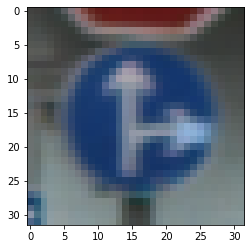

In [7]:
plt.imshow(X_train[1100])

### STEP #3: DATA VISUALIZATION

In [8]:
X_train.shape

(34799, 32, 32, 3)

In [9]:
X_test.shape

(12630, 32, 32, 3)

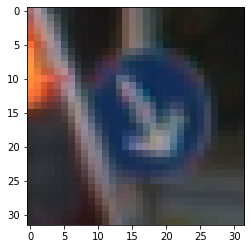

In [14]:
# Let's view some images!
i = random.randint(1,34000) 

plt.imshow( X_train[i] , cmap = 'gray') # reshape and plot the image

In [15]:
label = y_train[i]
label

38

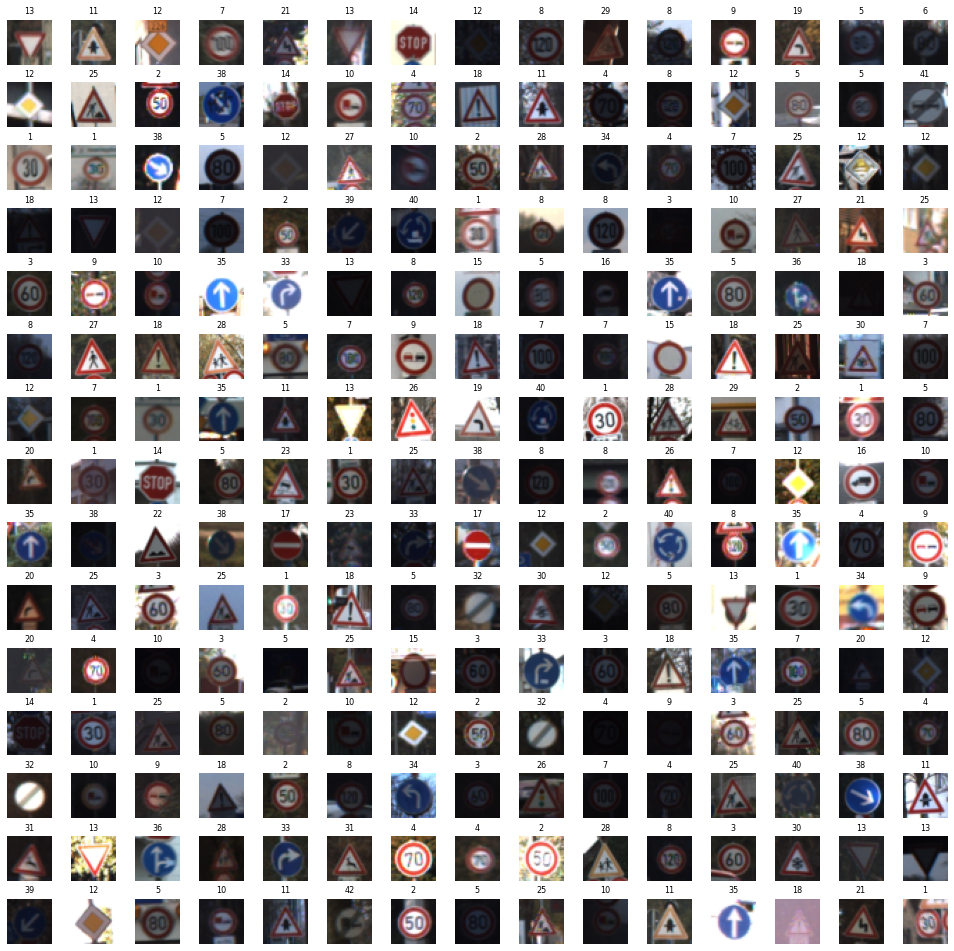

In [16]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

### STEP #4: DATA PROCESSING

In [17]:
X_train = X_train / 255
X_test = X_test / 255

### STEP #5: BUILD AND TRAIN OUR AUTOENCODER DEEP LEARNING MODEL

In [18]:
# autoencoder = tf.keras.models.Sequential()

# # Let's build the encoder CNN
# autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(32, 32, 3)))
# autoencoder.add(tf.keras.layers.BatchNormalization())
# autoencoder.add(tf.keras.layers.Activation('relu'))
# autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

# autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
# autoencoder.add(tf.keras.layers.BatchNormalization())
# autoencoder.add(tf.keras.layers.Activation('relu'))
# autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

# autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
# autoencoder.add(tf.keras.layers.BatchNormalization())
# autoencoder.add(tf.keras.layers.Activation('relu'))
# autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same")) # Encoded image (Code Layer)


# # Let's build the decoder CNN 
# autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
# autoencoder.add(tf.keras.layers.BatchNormalization())
# autoencoder.add(tf.keras.layers.Activation('relu'))
# autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

# autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
# autoencoder.add(tf.keras.layers.BatchNormalization())
# autoencoder.add(tf.keras.layers.Activation('relu'))
# autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))


# autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))
# autoencoder.add(tf.keras.layers.BatchNormalization())
# autoencoder.add(tf.keras.layers.Activation('relu'))
# autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

# autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))

In [19]:
autoencoder = tf.keras.models.Sequential()

# # Let's build the encoder CNN
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(32, 32, 3)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

# # Let's build the decoder CNN 
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))


autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))

In [20]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0

In [21]:
X_train.shape

(34799, 32, 32, 3)

In [22]:
X_test.shape

(12630, 32, 32, 3)

In [23]:
autoencoder.fit(X_train,          
          X_train, 
          epochs=20, 
          batch_size=200, 
          validation_data=(X_test, X_test))

Train on 34799 samples, validate on 12630 samples
Epoch 1/20
34799/34799 [==============================] - 164s 5ms/sample - loss: 0.4829 - val_loss: 0.5226
Epoch 2/20
34799/34799 [==============================] - 162s 5ms/sample - loss: 0.4708 - val_loss: 0.4948
Epoch 3/20
34799/34799 [==============================] - 161s 5ms/sample - loss: 0.4674 - val_loss: 0.4825
Epoch 4/20
34799/34799 [==============================] - 165s 5ms/sample - loss: 0.4661 - val_loss: 0.4634
Epoch 5/20
34799/34799 [==============================] - 173s 5ms/sample - loss: 0.4648 - val_loss: 0.4679
Epoch 6/20
34799/34799 [==============================] - 163s 5ms/sample - loss: 0.4637 - val_loss: 0.4628
Epoch 7/20
34799/34799 [==============================] - 173s 5ms/sample - loss: 0.4631 - val_loss: 0.4603
Epoch 8/20
34799/34799 [==============================] - 172s 5ms/sample - loss: 0.4630 - val_loss: 0.4589
Epoch 9/20
34799/34799 [==============================] - 179s 5ms/sample - loss: 0.46

### STEP #6: EVALUATE THE MODEL


In [25]:
predicted = autoencoder.predict(X_test[:10].reshape(-1, 32, 32, 3))

In [26]:
predicted.shape

(10, 32, 32, 3)

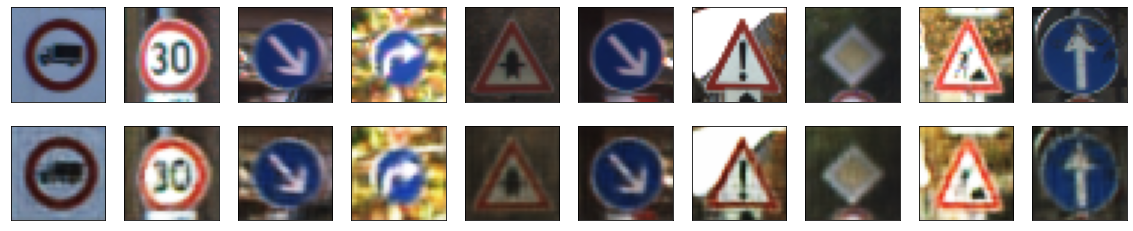

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)